In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv("Data/salaries.csv")

In [33]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


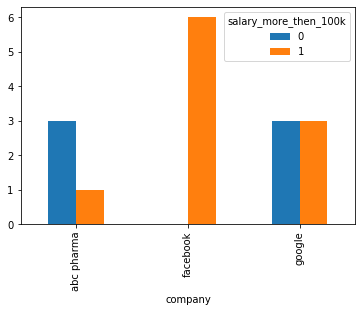

In [34]:
pd.crosstab(df.company, df['salary_more_then_100k']).plot(kind='bar')

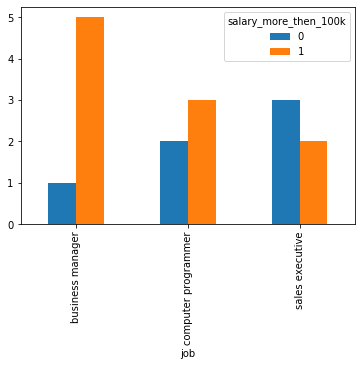

In [35]:
pd.crosstab(df.job, df['salary_more_then_100k']).plot(kind='bar')

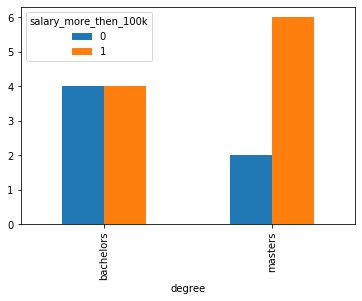

In [36]:
pd.crosstab(df.degree, df['salary_more_then_100k']).plot(kind='bar')

In [37]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [38]:
df['company_n'] = le_company.fit_transform(df['company'])
df['job_n'] = le_job.fit_transform(df['job'])
df['degree_n'] = le_degree.fit_transform(df['degree'])

In [39]:
target = df.salary_more_then_100k

In [40]:
df = df.drop(['company', 'job', 'degree', 'salary_more_then_100k'], axis='columns')

In [41]:
df

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [42]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [43]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [44]:
model.fit(df, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
model.predict([[2,1,0]])

array([0])

In [46]:
model.predict([[2,1,1]])

array([1])